In [2]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                   processed_text  sentiment_score
0          I coming border I kill          -0.6908
1      im getting borderland kill          -0.6908
2     im coming borderland murder          -0.6908
3  im getting borderland 2 murder          -0.6908
4    im getting borderland murder          -0.6908


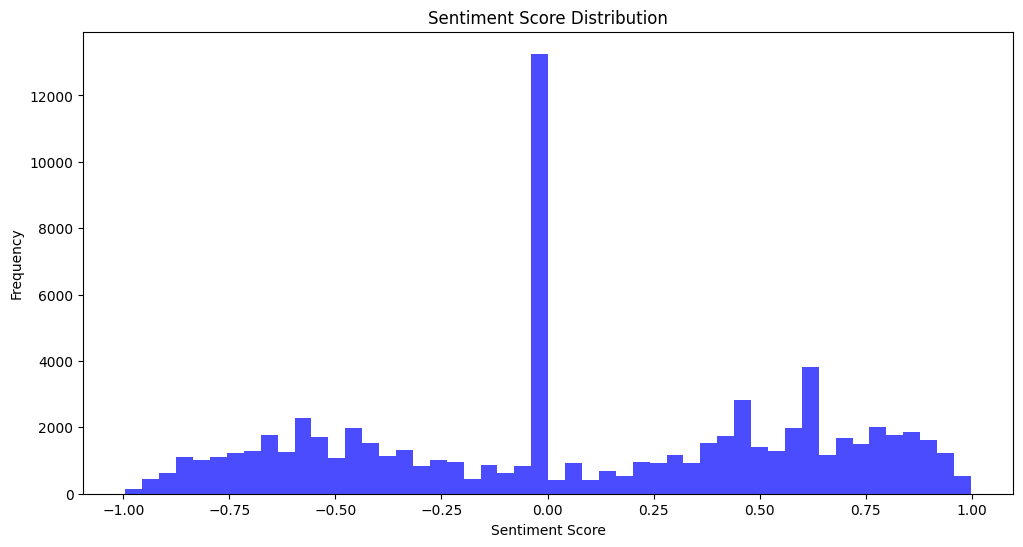


Positive examples:
                                       processed_text  sentiment_score
5  So I spent hour making something fun If know I...           0.9534
6  So I spent couple hour something fun If know I...           0.9485
7  So I spent hour something fun If know I HUGE B...           0.8918
8  So I spent hour making something fun If know I...           0.9534
9  2010 So I spent hour making something fun If k...           0.9534

Negative examples:
                    processed_text  sentiment_score
0          I coming border I kill          -0.6908
1      im getting borderland kill          -0.6908
2     im coming borderland murder          -0.6908
3  im getting borderland 2 murder          -0.6908
4    im getting borderland murder          -0.6908

Neutral examples:
            processed_text  sentiment_score
10                                     0.0
41    Check epic streamer              0.0
42    Check epic streamer              0.0
43  Watch epic striptease              0

In [22]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Prodigy Datasets/Twitter /twitter_training.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())
print(df.columns)

# Ensure columns are properly named
df.columns = ['id', 'game', 'sentiment', 'text']

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # Handle non-string values
    if not isinstance(tweet, str):
        return ""

    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [lemmatizer.lemmatize(word) for word in tweet_tokens if word not in stop_words and word.isalnum()]
    return " ".join(filtered_words)

# Apply preprocessing to the tweets
df['processed_text'] = df['text'].apply(preprocess_tweet)

# Extract sentiment scores
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['compound']

# Apply sentiment analysis to the processed tweets
df['sentiment_score'] = df['processed_text'].apply(get_sentiment)

# Display a sample of processed text and their sentiment scores
print(df[['processed_text', 'sentiment_score']].head())

# Visualize sentiment distribution
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment_score'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

# Review examples of positive, negative, and neutral sentiment tweets
positive_examples = df[df['sentiment_score'] > 0.5][['processed_text', 'sentiment_score']]
negative_examples = df[df['sentiment_score'] < -0.5][['processed_text', 'sentiment_score']]
neutral_examples = df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)][['processed_text', 'sentiment_score']]

print("\nPositive examples:\n", positive_examples.head())
print("\nNegative examples:\n", negative_examples.head())
print("\nNeutral examples:\n", neutral_examples.head())


   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      processed_text  sentiment_score
0  BBC News Amazon bos Jeff Bezos reject claim co...           0.1280
1          Why I pay WORD function poorly Chromebook          -0.1027
2  CSGO matchmaking full closet hacking truly awf...          -0.0258
3  Now President slapping Americans face really c...           0.3597
4  Hi I Madeleine McCann cellar past 13 year litt...           0.7178


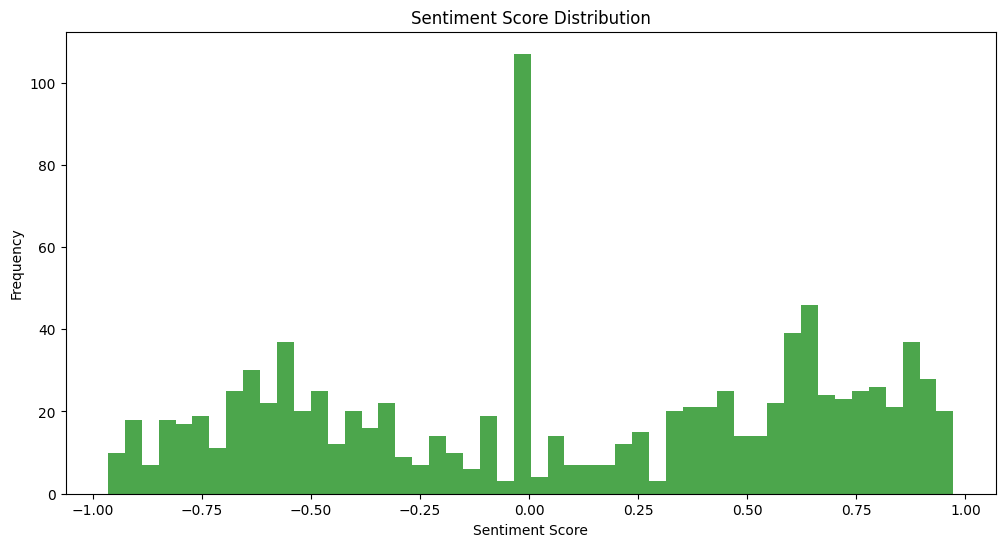


Positive examples:
                                        processed_text  sentiment_score
4   Hi I Madeleine McCann cellar past 13 year litt...           0.7178
6   Rocket League Sea Thieves Rainbow Six I love p...           0.7845
7   as still Assassins Creed Odyssey way anytime s...           0.5994
9   The professional dota 2 scene fucking explodin...           0.5095
15                                           yeah fun           0.6705

Negative examples:
                                        processed_text  sentiment_score
8   FIX IT JESUS Please FIX IT What In world going...          -0.6249
16                                          fuck life          -0.5423
17  happy birthday red dead redemption shit change...          -0.7650
23                           Umm I died said Bug This          -0.5574
33   Fortnite running like as fps drop everywhere wtf          -0.5267

Neutral examples:
                                        processed_text  sentiment_score
2   CSGO matchm

In [15]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Prodigy Datasets/Twitter /twitter_validation.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())
print(df.columns)

# Ensure columns are properly named
df.columns = ['id', 'game', 'sentiment', 'text']

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # Handle non-string values
    if not isinstance(tweet, str):
        return ""

    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [lemmatizer.lemmatize(word) for word in tweet_tokens if word not in stop_words and word.isalnum()]
    return " ".join(filtered_words)

# Apply preprocessing to the tweets
df['processed_text'] = df['text'].apply(preprocess_tweet)

# Extract sentiment scores
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['compound']

# Apply sentiment analysis to the processed tweets
df['sentiment_score'] = df['processed_text'].apply(get_sentiment)

# Display a sample of processed text and their sentiment scores
print(df[['processed_text', 'sentiment_score']].head())

# Visualize sentiment distribution
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment_score'], bins=50, color='green', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

# Review examples of positive, negative, and neutral sentiment tweets
positive_examples = df[df['sentiment_score'] > 0.5][['processed_text', 'sentiment_score']]
negative_examples = df[df['sentiment_score'] < -0.5][['processed_text', 'sentiment_score']]
neutral_examples = df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)][['processed_text', 'sentiment_score']]

print("\nPositive examples:\n", positive_examples.head())
print("\nNegative examples:\n", negative_examples.head())
print("\nNeutral examples:\n", neutral_examples.head())
